===========Done!===============
===========Done!===============
===========Done!===============


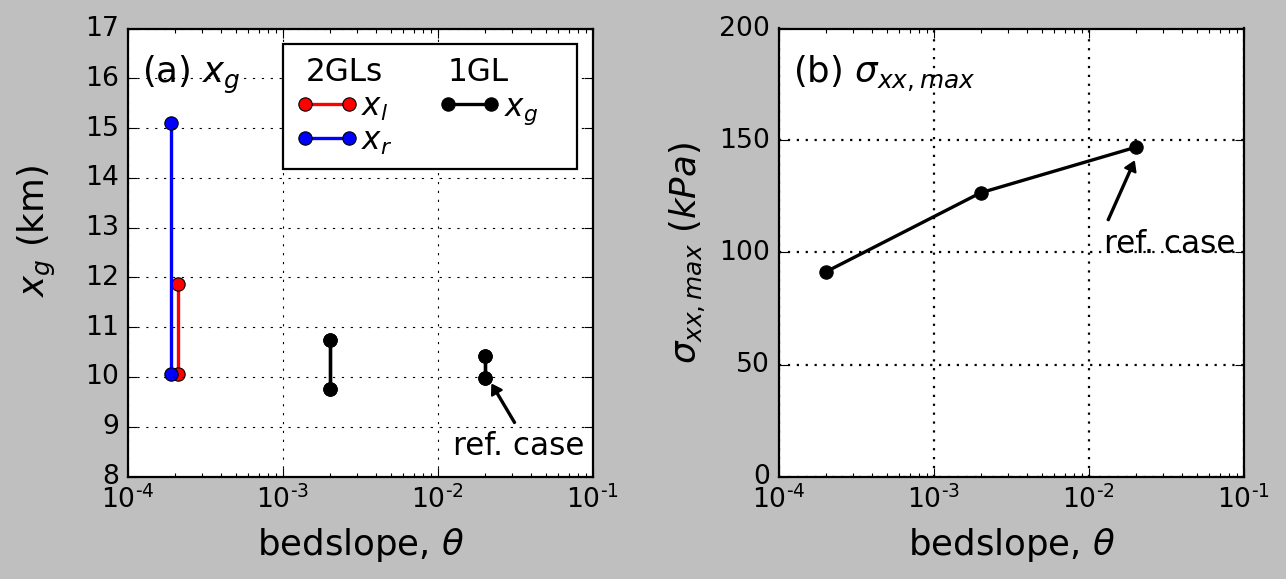

In [ ]:
#======================= import essential libraries ===========================
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager

#======================= input parameters  ===========================
Hght = 500               # Height(m)
Lngth = 2e4              # Lngth(m)               
tol = 1e-3               # Tolerance(m)
T = 0.5*3.154e7/(12.0*30.0)  # solar tide period
sea_level = Hght*0.917   # sea level(m)
r_lake = 0.5e3           # lake redius
KIc = 1e5                # Ice fracture toughness
rho_w = 1e3              # water density (kg/m^3)
rho_i = 917              # ice density (kg/m^3)
g = 9.8 # m/s^2          # gravity (m/s^2)
pi=math.pi               # pi
basin_elev = 80.0        # basin_elevation (m)
depth_basin = 90.0 - basin_elev  # basin depth (m)
# plot settings
fs = 16
marker = 6               # MarkerType
ny=1e4                   # y grid resolution

#======================= read data ===========================
vfile =['../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_3_A1e_25_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_4_A1e_25_n3_0_mu0_30e9_deltap1e_13_deltav1e_18_C1_2e7_DX25_tide1_00']

# correct the name of results
for file in vfile:
    path = file + "/line_plot_data"
    # print "name :", os.listdir(path)
    listName = os.listdir(path)
    for files in listName:
        if files[-4:]=='.txt':
            continue
        else:
            txtName = files + '.txt'
            os.rename(os.path.join(path,files), os.path.join(path,txtName))
    print ("===========Done!===============")

X = [] # list of xcoord
x_left = []
x_right = []
s_mean = []
h_mean = []
max_tension = []
max_tension_net = []

t =  np.loadtxt(vfile[0] + "/line_plot_data/t.txt", dtype='f', delimiter=' ')
max_row = np.shape(t)[0]
for file in vfile:
    X.append(np.loadtxt(file + "/line_plot_data/X.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_left.append(np.loadtxt(file + "/line_plot_data/x_left.txt", dtype='f', delimiter=' ',max_rows=max_row))
    x_right.append(np.loadtxt(file + "/line_plot_data/x_right.txt", dtype='f', delimiter=' ',max_rows=max_row))
    s_mean.append(np.loadtxt(file + "/line_plot_data/s_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    h_mean.append(np.loadtxt(file + "/line_plot_data/h_mean.txt", dtype='f', delimiter=' ',max_rows=max_row))
    max_tension_net.append(np.loadtxt(file + "/max_tension_net.txt", dtype='f', delimiter=' ',max_rows=max_row))
    max_tension.append(np.loadtxt(file + "/max_tension.txt", dtype='f', delimiter=' ',max_rows=max_row))

vtheta = [2e-2,2e-3,2e-4]
# =========================== figure =========================== 
fig,ax = plt.subplots(figsize=(9,3.5),nrows=1,ncols=2, constrained_layout=False)
plt.rcParams["figure.dpi"] = 300
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

# range of the time
na = np.argmin(np.abs(t/T-10.0))               
nb = np.argmin(np.abs(t/T-11.0)) 

# labels = ['(a) DX=6.25','(a) DX=25','(b) DX=50','(c) DX=100']
labels = ['(a) theta=2e-2','(b) theta=2e-3','(c) theta=2e-4']
vcolor = ['k','y','b','r','g']

# =================== (a) ======================
ax = plt.subplot(121)
count =0
xr_range = []
xl_range = []
delta_xg = []
for i,file in enumerate(vfile):
    width = x_right[i][na:nb]-x_left[i][na:nb]
    xr_range.append(x_right[i][na:nb])
    xl_range.append(x_left[i][na:nb])
    count += 1
t1 = Rectangle((0,0), 0, 0, color='w')
tol = 1.0e-5

# figure
for i,file in enumerate(vfile):
    if i<2:
        if i == 0:
            xg, = ax.plot([vtheta[i],vtheta[i]],[xl_range[i].min()/1e3,xl_range[i].max()/1e3],\
                    linewidth=1.5,linestyle='-',marker='o', markersize=6,color='k')
        else:
            ax.plot([vtheta[i],vtheta[i]],[xl_range[i].min()/1e3,xl_range[i].max()/1e3],\
                linewidth=1.5,linestyle='-',marker='o', markersize=6,color='k')
        ax.plot([vtheta[i],vtheta[i]],[xr_range[i].min()/1e3,xr_range[i].max()/1e3],\
            linewidth=1.5,linestyle='-',marker='o', markersize=6,color='k')

xl, = ax.plot([vtheta[i]+tol,vtheta[i]+tol],[xl_range[i].min()/1e3,xl_range[i].max()/1e3],\
            linewidth=1.5,linestyle='-',color='r',marker='o', markersize=6,label=r'$x_l$')
xr, = ax.plot([vtheta[i]-tol,vtheta[i]-tol],[xr_range[i].min()/1e3,xr_range[i].max()/1e3],\
            linewidth=1.5,linestyle='-',color='b',marker='o',markersize=6,label=r'$x_r$')

ax.annotate(r'ref. case',xy=(vtheta[0]*1.1,xl_range[0].min()/1e3-0.1),xytext=(0.7,0.05), xycoords='data', textcoords='axes fraction',\
            fontsize=fs-2, math_fontfamily='dejavusans',\
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5, headlength=4),)
ax.set_xscale('log')

ax.set_ylim([8,17])
ax.set_ylabel(r'$x_g$ (km)', math_fontfamily='dejavusans',fontsize = fs)
ax.yaxis.set_label_coords(-.15, .55)

ax.set_xlabel(r'bedslope, $\theta$',fontsize = fs, math_fontfamily='dejavusans')
font = font_manager.FontProperties(math_fontfamily='dejavusans',
                                   style='normal', size=fs-2)
lgd = ax.legend([t1,xl,xr,t1,xg],["2GLs",r'$x_l$',r'$x_r$',"1GL",r'$x_g$'],loc="upper right",ncol=2,prop=font,\
                fontsize=fs-2,labelspacing = 0.1,markerscale=1,handletextpad=0.1,columnspacing=0.0)
for item, label in zip(lgd.legendHandles, lgd.texts):
    if label._text  in ["2GLs","1GL"]:
        width=item.get_window_extent(fig.canvas.get_renderer()).width
        label.set_ha('left')
        label.set_position((-2*width,0))

ax.grid(True,linewidth=0.5)
ax.annotate('(a) $x_g$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.40, hspace=0.2)

# =================== (b) ======================
ax = plt.subplot(122)
count =0
sigma = []
for i,file in enumerate(vfile):
    sigma_max = np.max(max_tension_net[i][na:nb])
    sigma.append(sigma_max)
    count += 1
sigma = np.array(sigma)
ax.plot(vtheta,sigma/1e3,'-',color=vcolor[0],linewidth = 1.5,marker='o')    

ax.annotate(r'ref. case',xy=(vtheta[0],sigma[0]/1e3-5),xytext=(0.7,0.5), xycoords='data', textcoords='axes fraction',\
            fontsize=fs-2, math_fontfamily='dejavusans',\
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5, headlength=4),)

# y-axis
ax.set_ylim([0,200])
# ax.set_yscale('log')
ax.set_ylabel(r'$\sigma_{xx,max}~(kPa)$',math_fontfamily='dejavusans',fontsize = fs)

# x-axis
ax.set_xscale('log')
ax.set_xlabel(r'bedslope, $\theta$',fontsize = fs, math_fontfamily='dejavusans')

# grid
ax.grid(True,linewidth=1)
ax.annotate('(b) $\sigma_{xx,max}$',xy=(0.03,0.88),xycoords='axes fraction',fontsize=fs, math_fontfamily='dejavusans')

font = font_manager.FontProperties(math_fontfamily='dejavusans',
                                   style='normal', size=fs-2)

plt.savefig('../figures/figure_5.jpeg',bbox_inches='tight',dpi=300)
# plt.savefig('../figures/figure_5(high-resolution).tiff',bbox_inches='tight',dpi=600)